In [1]:
import pandas as pd
import matplotlib.pyplot as plt
full_db =  pd.read_excel('Final formated DB.xlsx')
full_db = full_db.loc[full_db['Exclusion'] == 'No']
full_db = full_db.loc[full_db['Change of Insuline medication'] == 'NO']
ins_db = full_db.loc[full_db['OGTT Insuline'] == 'Yes']
cpept_df = full_db.loc[full_db['OGTT C peptide'] == 'Yes']

from analysis_script import parallel, swarmbox_m0_m3
import warnings
warnings.filterwarnings('ignore')

swarmbox_m0_m3(ins_db, 'AUC Insuline')
parallel(ins_db, 'AUC Insuline')
plt.show()

             All M0    Inuline M0  Maltodextrine M0        All M3  \
count     65.000000     34.000000         31.000000     64.000000   
mean   13253.323077  14449.735294      11941.129032  11238.796875   
std     6815.960541   7773.627554       5406.960999   6145.050446   
min     4103.000000   4749.000000       4103.000000   3430.000000   
25%     8001.000000   8873.250000       7962.500000   6900.000000   

         Inuline M3  Maltodextrine M3    Difference  Difference Inu  \
count     33.000000         31.000000     64.000000       33.000000   
mean   11280.242424      11194.677419  -1858.265625    -2902.696970   
std     6430.260838       5932.179096   4786.829289     4164.763532   
min     3430.000000       3590.000000 -15409.000000   -13736.000000   
25%     6678.000000       7391.500000  -4303.500000    -5225.000000   

       Difference Malto  
count         31.000000  
mean        -746.451613  
std         5209.604770  
min       -15409.000000  
25%        -3358.000000  


<Figure size 600x300 with 2 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

              All M0     Inuline M0  Maltodextrine M0         All M3  \
count      58.000000      29.000000         29.000000      62.000000   
mean   355951.172414  336367.068966     375535.275862  332370.854839   
std    121023.317825  137019.425677     101230.373840  131032.564671   
min      6648.000000    6648.000000     234523.000000   13366.000000   
25%    288973.500000  258162.000000     308941.000000  258467.000000   

          Inuline M3  Maltodextrine M3     Difference  Difference Inu  \
count      32.000000         30.000000      58.000000       29.000000   
mean   323429.687500     341908.100000  -21974.517241   -11263.724138   
std    154856.047729     101482.503619   75807.414258    73575.127442   
min     13366.000000     155040.000000 -193896.000000  -159145.000000   
25%    225455.500000     271260.750000  -64269.750000   -46130.000000   

       Difference Malto  
count         29.000000  
mean      -32685.310345  
std        77767.819610  
min      -193896.000000 

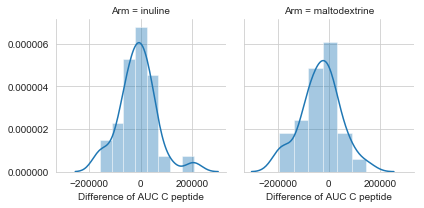

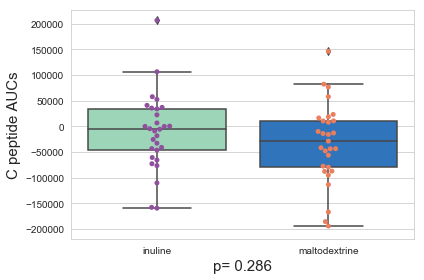

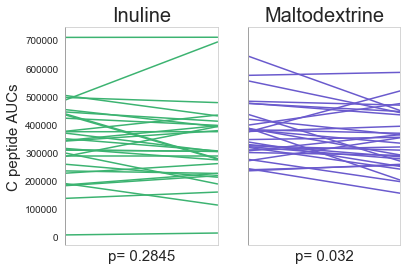

In [2]:
swarmbox_m0_m3(ins_db, 'AUC C peptide')
parallel(ins_db, 'AUC C peptide')

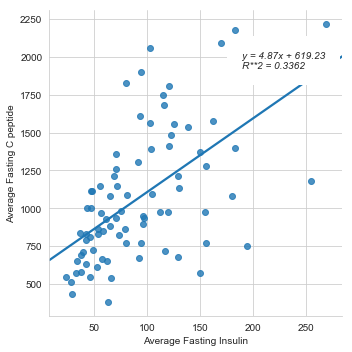

The pearson rho is 0.5798424411558807 with a p-value of 1.1398867069185921e-08
The spearman rho is 0.6009327332874499 with a p-value of 2.388125604175284e-09


In [3]:
test_df = full_db.loc[full_db['Time point'] == 'M0']
test_df = test_df[['Average Fasting Insulin', 'Average Fasting C peptide']]
test_df['Average Fasting Insulin'] =test_df['Average Fasting Insulin'].apply(lambda x : x*6)

import seaborn as sns
import scipy.stats


def lineareg(df, x, y):
    df = df[[x,y]].dropna()
    slope, intercept, r_value, d, e = scipy.stats.linregress(df[x], df[y])
    sns.lmplot(x=x, y=y, data=df, ci=None)
    legend = 'y = '+str(round(slope,2))+'x + '+str(round(intercept, 2))+'\n'+'R**2 = '+str(round(r_value**2,4))
    x_box_coor = plt.gca().get_xlim()[1] - plt.gca().get_xlim()[1]/3
    y_box_coor = plt.gca().get_ylim()[1] - plt.gca().get_ylim()[1] / 6
    plt.gca().text(x_box_coor, y_box_coor, legend, style='italic',
            bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10, 'lw':10})

lineareg(test_df, 'Average Fasting Insulin', 'Average Fasting C peptide')
plt.show()
test_df = test_df[['Average Fasting Insulin', 'Average Fasting C peptide']].dropna()
r, p = scipy.stats.pearsonr(test_df['Average Fasting Insulin'], test_df['Average Fasting C peptide'])
print('The pearson rho is '+str(r)+' with a p-value of '+str(p))
r, p = scipy.stats.spearmanr(test_df['Average Fasting Insulin'], test_df['Average Fasting C peptide'])
print('The spearman rho is '+str(r)+' with a p-value of '+str(p))